# Mid project

![Minions Plane - Minions The Rise Of Gru](https://i.makeagif.com/media/7-20-2022/V5mVuU.gif)

## Ideas principales 

1º idea: Quiero predecir el precio de los vuelos a paises de europa solo, con una sola aerolinia. Podemos usar una api que bsuquemos o directamente una data set que contenga precios de vuelos y los paises a los que van, hacer una prediccion del precio insertando el pais de destino, el de origen, la hora del vuelo y el dia de la semana. Supongo que sera con un modelo de machine learning supervisado para predecir una columna de precio por lo que sera un modelo de regresion y tendre que comparar con todos los demas modelos de regresion para saber cual me es mas efectivo.

# Importamos las librerias que necesitemos

In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) 

## leemos el csv

In [2]:
df=pd.read_csv('C:/Users/gaelm/Desktop/Clean_Dataset.csv.zip')

### Eliminamos la columna de unnamed: 0  por que no tenia absolutamente nada

In [3]:
df=df.drop('Unnamed: 0',axis=1)

### Creamos una nueva columna con la conversion de rupias a euros

In [4]:
df["euros_price"] = df["price"].apply(lambda precio: precio / 90)

In [5]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,euros_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,66.144444
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,66.144444
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,66.177778
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,66.166667
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,66.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,769.611111
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,856.722222
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,878.877778
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,906.500000


# Empezamos a investigar la data

In [6]:
df["source_city"].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [7]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
euros_price         0
dtype: int64

In [8]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

In [9]:
df1

,flight,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,euros_price
0,6E-102,Indigo,39,39,39,39,39,39,39,39,39,39
1,6E-105,Indigo,5,5,5,5,5,5,5,5,5,5
2,6E-113,Indigo,49,49,49,49,49,49,49,49,49,49
3,6E-121,Indigo,20,20,20,20,20,20,20,20,20,20
4,6E-123,Indigo,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1556,UK-988,Vistara,1381,1381,1381,1381,1381,1381,1381,1381,1381,1381
1557,UK-993,Vistara,911,911,911,911,911,911,911,911,911,911
1558,UK-994,Vistara,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273
1559,UK-995,Vistara,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024


## Hacemos distintos graficos para observar mejor los datos

### En esta grafica podemos obsevar que la aerolinia mas famosa en la india es la indigo

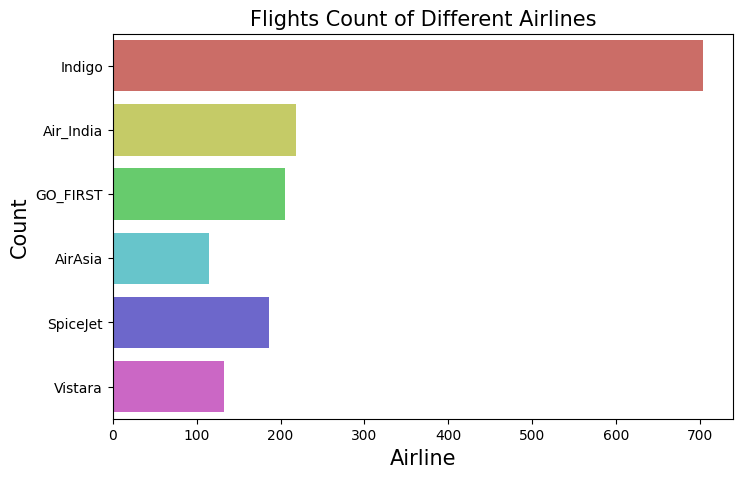

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [11]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

### Aqui tambien podemos ver que la cñase economy es muy popular por la asequibilidad de los precios que tiene en comparacion con la clase business.

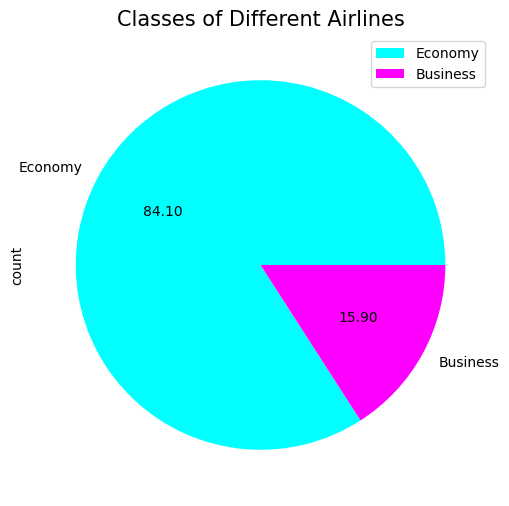

In [12]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

### Vemos que aerolinia con los precios mas altos es la de vustara

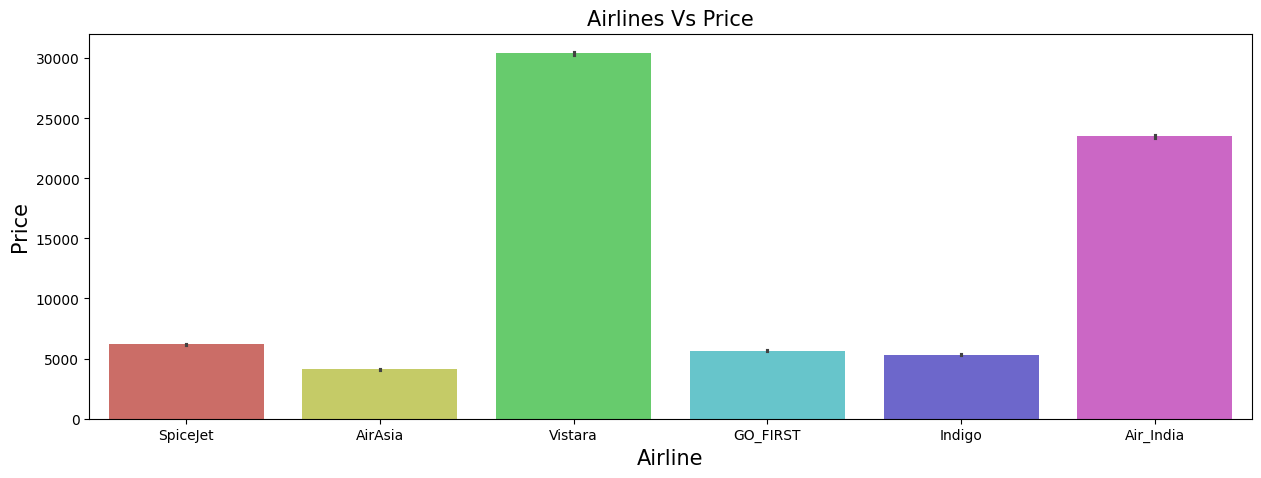

In [13]:
 plt.figure(figsize=(15,5))
sns.barplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

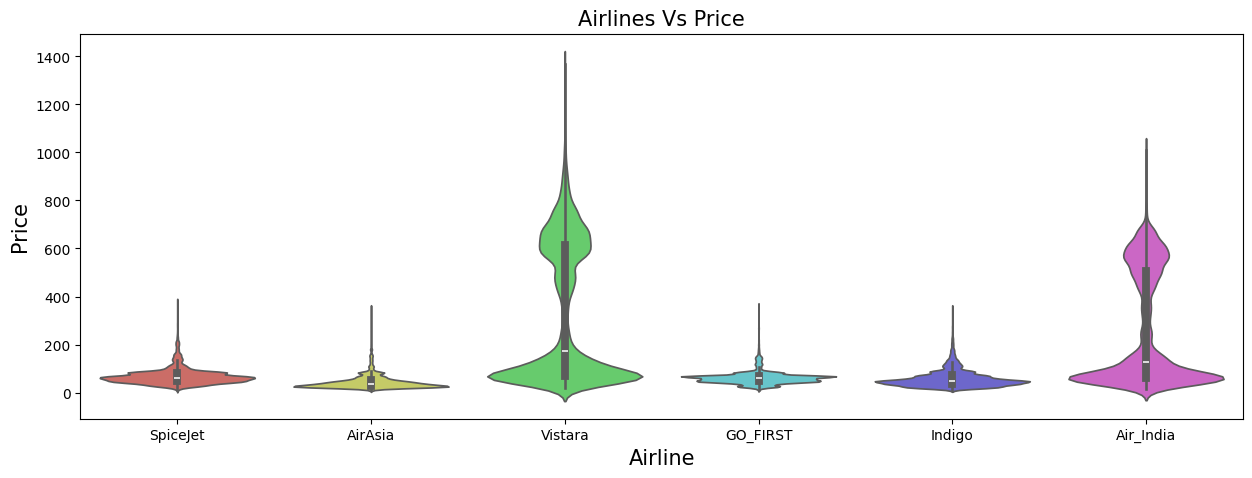

In [14]:
 plt.figure(figsize=(15,5))
sns.violinplot(x=df['airline'],y=df['euros_price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

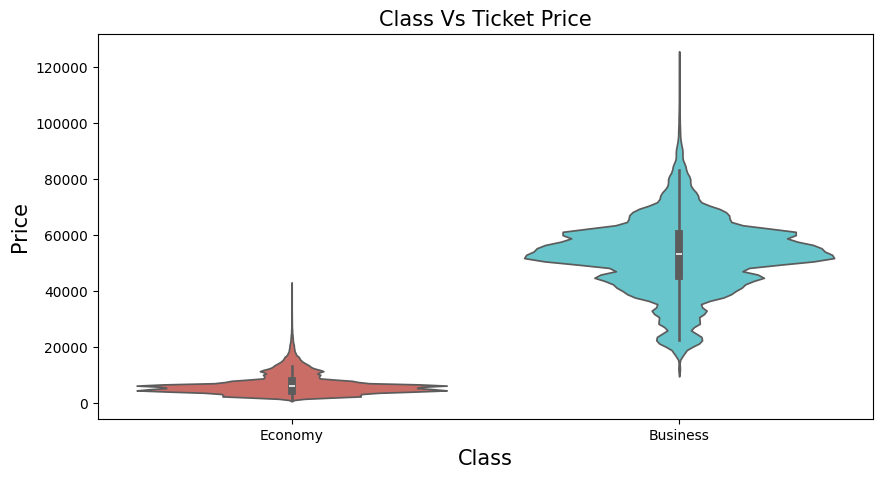

In [15]:
plt.figure(figsize=(10,5))
sns.violinplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

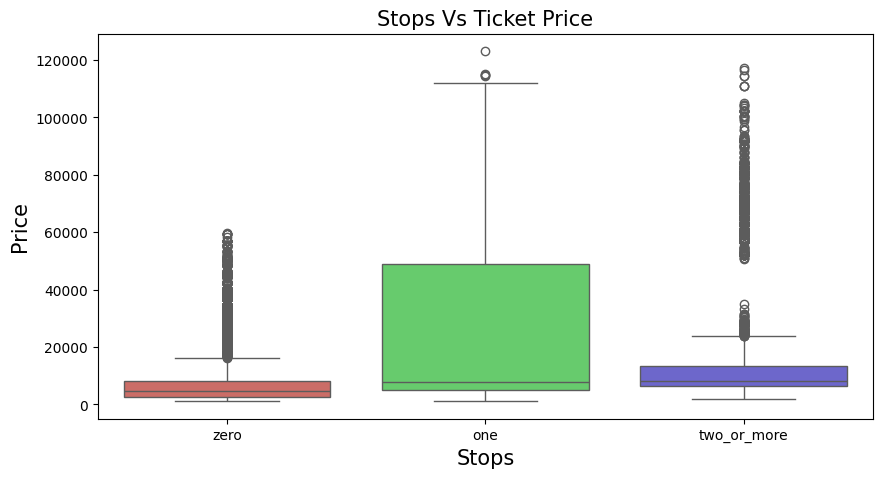

In [16]:
  plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

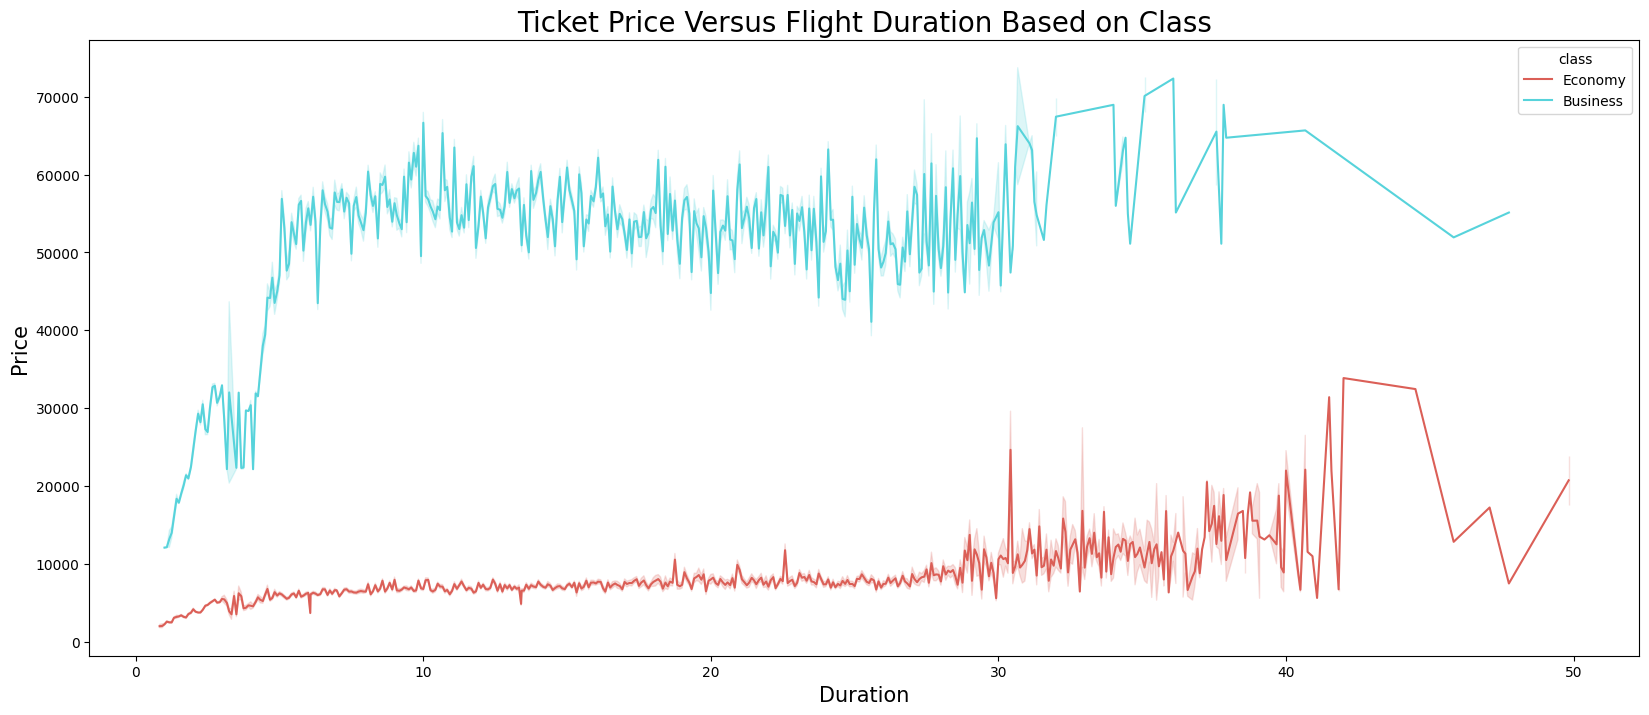

In [17]:

plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

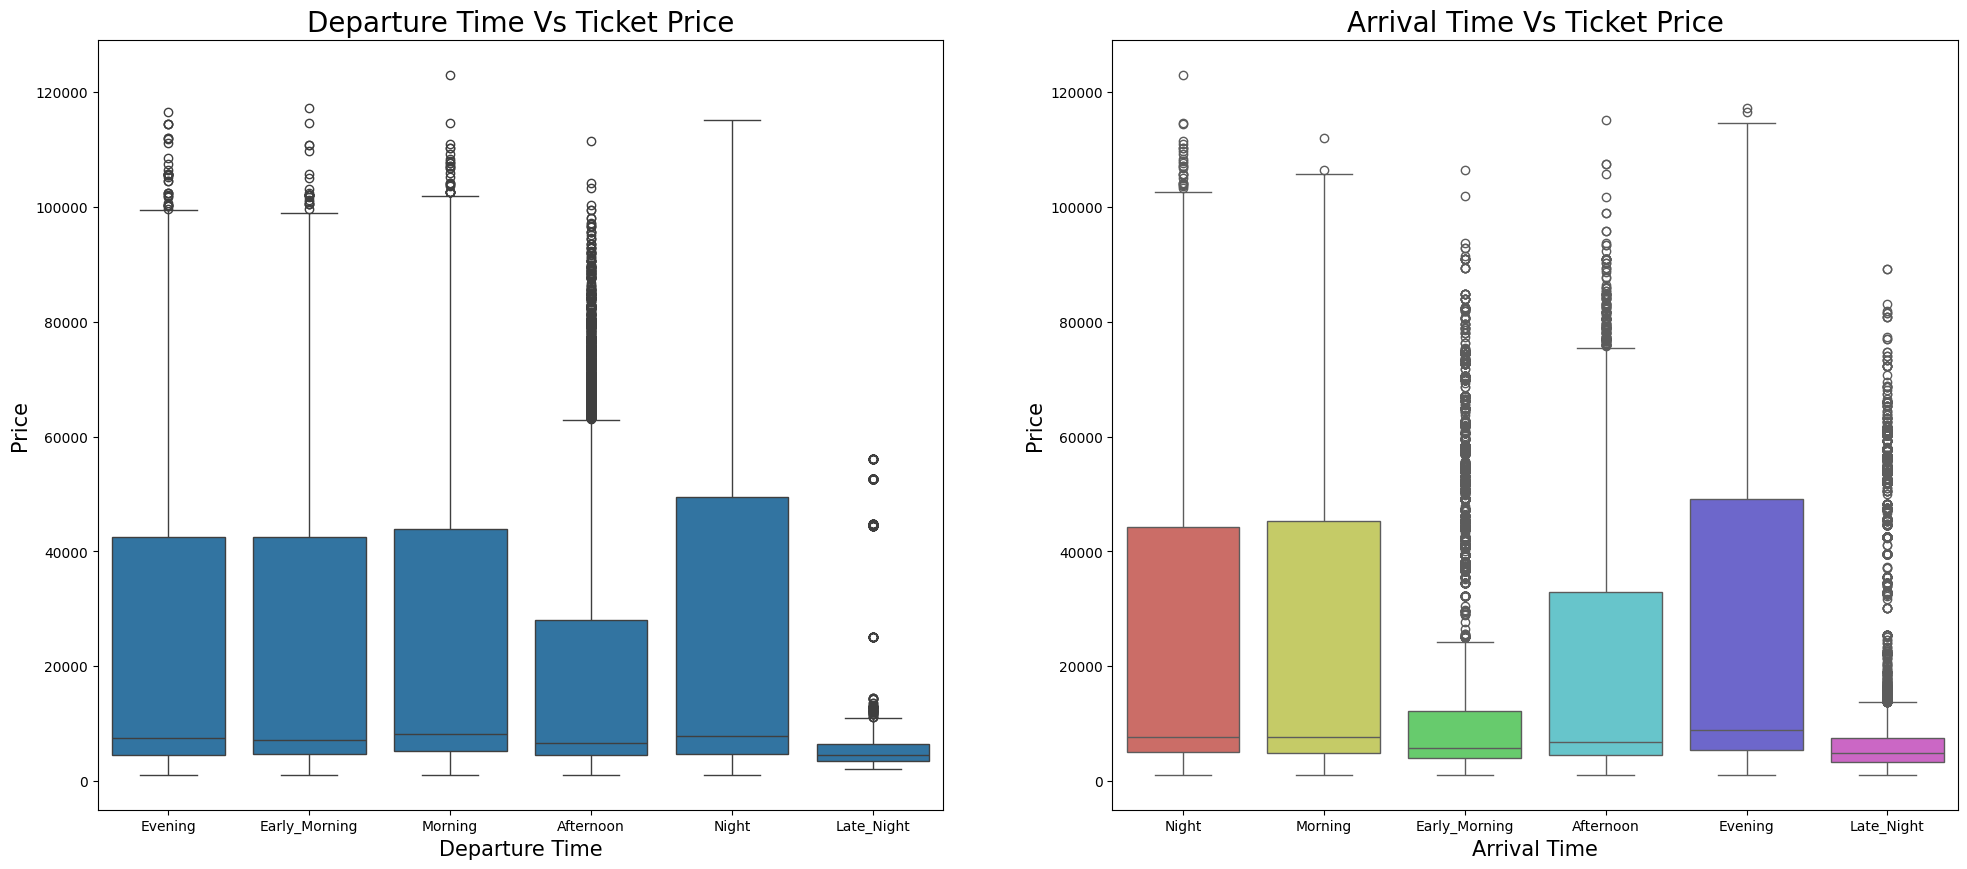

In [18]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### Hacemos un crosstab y vemos que solo la aerolinia de air india y la de vistara tienen vuelos ne business

In [19]:
crosstab_df= pd.crosstab(index = df["airline"], columns=df["class"])
crosstab_df

class,Business,Economy
airline,,
AirAsia,0,16098
Air_India,32898,47994
GO_FIRST,0,23173
Indigo,0,43120
SpiceJet,0,9011
Vistara,60589,67270


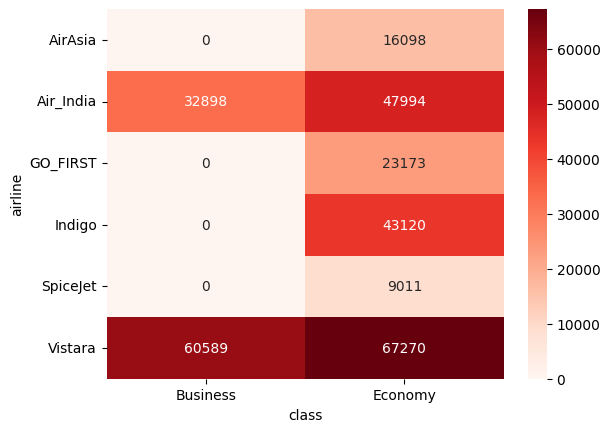

In [20]:
sns.heatmap(crosstab_df, annot=True, cmap="Reds", fmt="d")
plt.show()

In [21]:
 df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [22]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


### separamos las categoricas de las numericas

In [23]:
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

In [24]:
num

,duration,days_left,price,euros_price
0,2.17,1,5953,66.144444
1,2.33,1,5953,66.144444
2,2.17,1,5956,66.177778
3,2.25,1,5955,66.166667
4,2.33,1,5955,66.166667
...,...,...,...,...
300148,10.08,49,69265,769.611111
300149,10.42,49,77105,856.722222
300150,13.83,49,79099,878.877778
300151,10.00,49,81585,906.500000


### Hacemos la coorrelacion de las numericas y hacemos u heatmap de las coorrelaciones

In [25]:
num.corr()

,duration,days_left,price,euros_price
duration,1.000000,-0.039157,0.204222,0.204222
days_left,-0.039157,1.000000,-0.091949,-0.091949
price,0.204222,-0.091949,1.000000,1.000000
euros_price,0.204222,-0.091949,1.000000,1.000000


In [26]:
corr_df = num.corr()

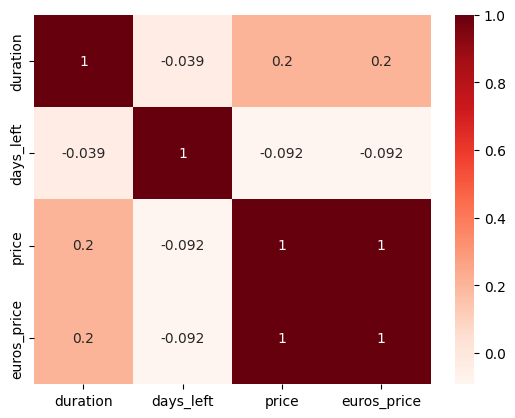

In [27]:
sns.heatmap(corr_df, annot=True, cmap="Reds")
plt.show()

In [28]:
cat

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business


### Hacemos un crosstab de las categoricas flight y departure time

In [29]:
crosstab_result= pd.crosstab(index = cat["flight"], columns=cat["departure_time"])
crosstab_result

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
flight,,,,,,
6E-102,0,0,39,0,0,0
6E-105,5,0,0,0,0,0
6E-113,0,0,0,0,49,0
6E-121,0,20,0,0,0,0
6E-123,5,0,0,0,0,0
...,...,...,...,...,...,...
UK-988,0,0,0,0,0,1381
UK-993,911,0,0,0,0,0
UK-994,0,0,0,0,1273,0


### creamos una copia del df limpio para hacer un csv nuevo para trabajar en tableau

In [30]:
df_clean=df.copy()

In [31]:
df_clean

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,euros_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,66.144444
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,66.144444
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,66.177778
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,66.166667
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,66.166667
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,769.611111
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,856.722222
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,878.877778
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,906.500000


In [32]:
df_clean.to_csv("vuelos_limpio.csv", index =False)

In [33]:
df_clean.groupby(["source_city"])["price"].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64